### Project 1 : Using chemical analysis to determine the quality wines

In [3]:
# Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
%config IPCompleter.greedy=True

In [ ]:
from sklearn.metrics import 

In [2]:
# Import dataset
df = pd.read_csv("winequality.csv", sep = ';')

#### 1) Checking and understanding the data

In [3]:
# Checking the data format
print('Numbers of lines and columns: {0}'.format(df.shape))
print('\n')
print(df.head())
print('\n')
print(df.info())
print('\n')

Numbers of lines and columns: (1599, 12)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  

In [4]:
# Checking missing datas

print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
# Find hidden missing values

print("Number of hidden missing values in citric acid variable: ", df["citric acid"].loc[df["citric acid"] == 0].count())

Number of hidden missing values in citric acid variable:  132


In [6]:
# Treating hidden missing values
# Substituting values equal zero by the mean of column.

from sklearn.impute import SimpleImputer
hidden = SimpleImputer(missing_values = 0, strategy = "mean")

df['citric acid'] =  hidden.fit_transform(df[['citric acid']])

In [7]:
# Checking if exist any hidden values

print("Number of hidden missing values in citric acid variable: ", df["citric acid"].loc[df["citric acid"] == 0].count())

Number of hidden missing values in citric acid variable:  0


#### 2) Exploratory data analyzis

In [8]:
# Describe data

print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.295358        2.538806   
std         1.741096          0.179060     0.177021        1.409928   
min         4.600000          0.120000     0.010000        0.900000   
25%         7.100000          0.390000     0.150000        1.900000   
50%         7.900000          0.520000     0.295358        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

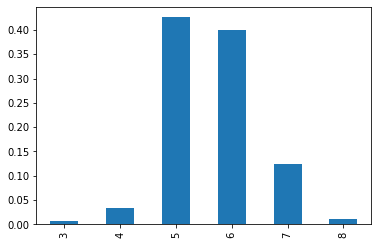

In [9]:
df['quality'].value_counts(normalize=True, sort=False).plot.bar()

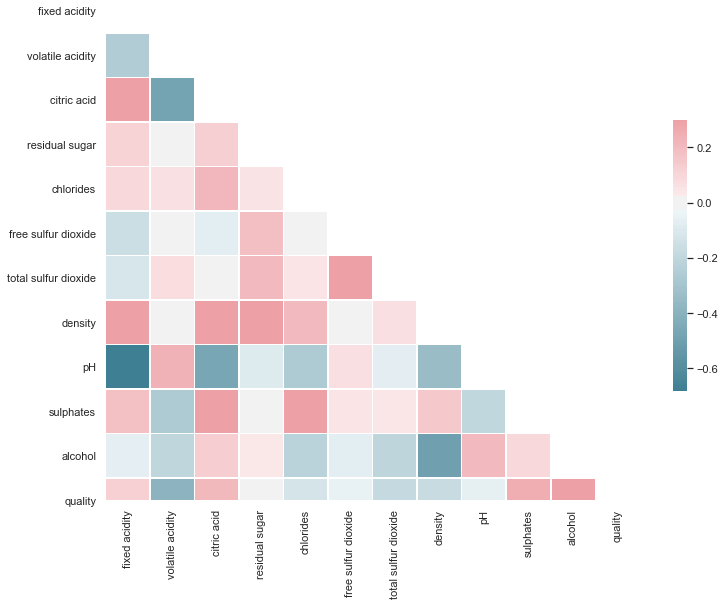

In [14]:
import seaborn as sns

sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.tight_layout()

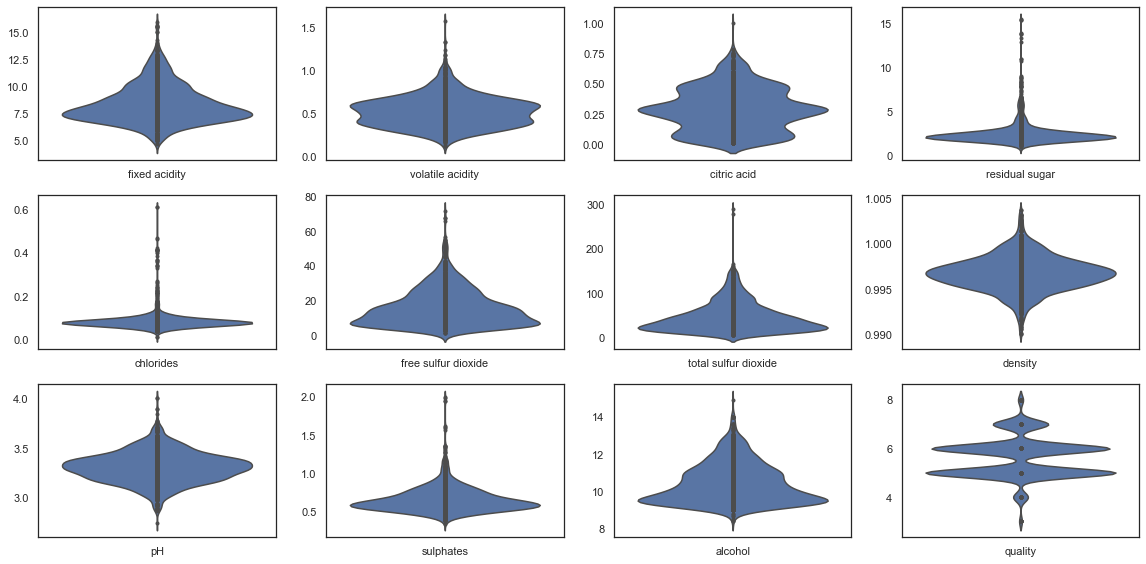

In [13]:
import pandas as pd
fig = plt.figure(figsize=(16,8))
for i, col in enumerate(df.columns):
    ax=plt.subplot(3,4,i+1) 
    sns.violinplot(data=df[[col]], inner="points")
plt.tight_layout()

In [12]:
quality_df = df.groupby("quality")[df.columns].agg('median')
quality_df.drop(['quality'], axis=1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.50,0.845,0.295358,2.1,0.0905,6.0,15.0,0.997565,3.39,0.545,9.925
4,7.50,0.670,0.240000,2.1,0.0800,11.0,26.0,0.996500,3.37,0.560,10.000
5,7.80,0.580,0.260000,2.2,0.0810,15.0,47.0,0.997000,3.30,0.580,9.700
6,7.90,0.490,0.295358,2.2,0.0780,14.0,35.0,0.996560,3.32,0.640,10.500
7,8.80,0.370,0.400000,2.3,0.0730,11.0,27.0,0.995770,3.28,0.740,11.500
8,8.25,0.370,0.420000,2.1,0.0705,7.5,21.5,0.994940,3.23,0.740,12.150


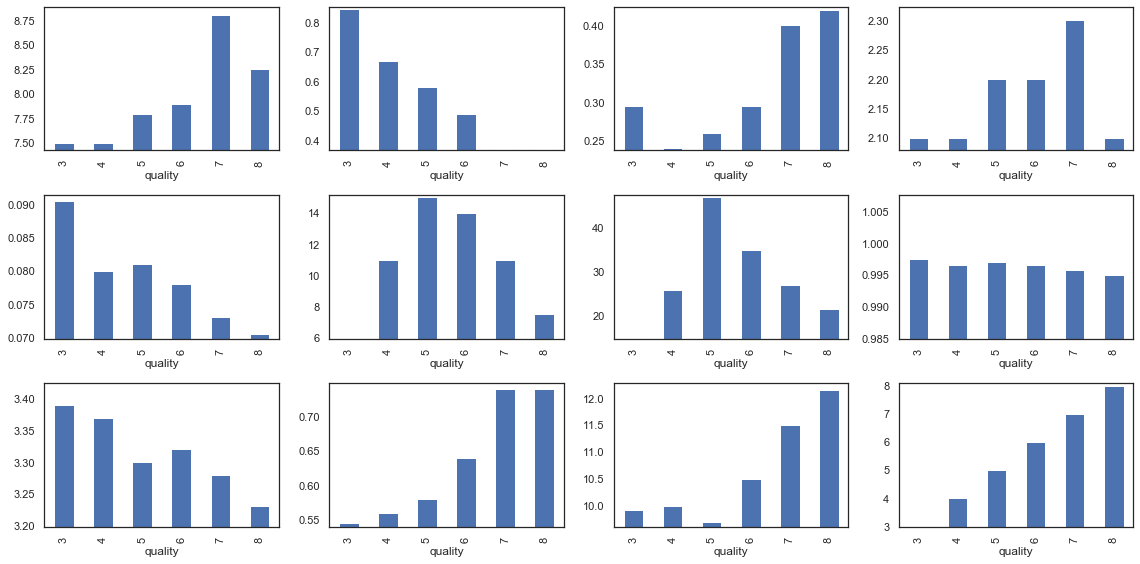

In [15]:
fig = plt.figure(figsize=(16,8))
for i, col in enumerate(quality_df.columns):
    ax=plt.subplot(3,4,i+1) 
    quality_df[col].plot.bar()
    ax.set
    ax.set_ylim([quality_df[col].min()-quality_df[col].min() *0.01,quality_df[col].max()+quality_df[col].max()*0.01])
plt.tight_layout()

In [8]:
# Variable explanatory(Feature Selection)
X = df.drop('quality', axis=1)

# Variable target
y = df[['quality']]

In [9]:
# Splitting of data - 75% for training data and 25% for test data
# Importing the train_test_split

from sklearn.model_selection import train_test_split

# Setting split rate
split_test_size = 0.25

# Creating test data and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = split_test_size, random_state = 42)

In [11]:
# Printing results

print("{0:0.2f}% in data train.".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in data test.".format((len(X_test)/len(df.index)) * 100))

74.98% in data train.
25.02% in data test.


## Lasso Regression: Building, Trainning and Checking accuracy
- Choice of algorithms was decided with the help of FlowChart from ScikitLearn (Regression algorithms)

In [ ]:
# Como aproximadamente 42% de todos as notas de vinho no dataset recebem nota 5
# Baseline minimo definido: 42%

In [10]:
# Importing the linear model 'Lasso', make pipeline and mean absolute error metrics.
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier 
from sklearn.metrics import accuracy_score


def model(X_train, y_train, X_test, y_test):
    
    # Importing models
    from sklearn.linear_model import RidgeClassifier, SGDClassifier
    from sklearn.svm import LinearSVC, SVC
    from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
    from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier 
    from xgboost import XGBClassifier

    models = [RidgeClassifier(), SGDClassifier(), LinearSVC(), SVC(), DecisionTreeClassifier(), ExtraTreeClassifier(),                                      AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), RandomForestClassifier(), XGBClassifier()]

    models_name = ["RidgeClassifier", "SGDClassifier", "LinearSVC", "SVC", "DecisionTreeClassifier", "ExtraTreeClassifier",                                      "AdaBoostClassifier", "BaggingClassifier", "GradientBoostingClassifier", "RandomForestClassifier", "XGBClassifier"]
    # Repetindo

    valor = []

    for i in models:
        model = i
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        valor.append(acc)
        results = pd.DataFrame(list(zip(models_name, valor)), columns=["Model", "Accuracy"])
    
    return results

model(X_train, y_train, X_test, y_test)

,Model,Accuracy
0,RidgeClassifier,0.5675
1,SGDClassifier,0.4650
2,LinearSVC,0.4575
3,SVC,0.5400
4,DecisionTreeClassifier,0.5850
5,ExtraTreeClassifier,0.5600
6,AdaBoostClassifier,0.5225
7,BaggingClassifier,0.6150
8,GradientBoostingClassifier,0.6175
9,RandomForestClassifier,0.6625


In [11]:
# Top 3 Models - BaggingClassifier, GradientBoosting, RandomForest

# Cross Validation

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

bagging_model = BaggingClassifier()
gboost_model = GradientBoostingClassifier()
ranfo_model = RandomForestClassifier()

crosses_models = [bagging_model, gboost_model, ranfo_model]

for i in crosses_models:
    scores = cross_val_score(i, X_train, y_train, cv=5)
    print(scores.mean())

0.6316842840808683
0.6373639561164541
0.640777661641106


In [12]:
# Standard Scalar

from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
X_train_stand = standard.fit_transform(X_train)
X_test_stand = standard.fit_transform(X_test)

In [140]:
model(X_train_stand, y_train, X_test_stand, y_test)

,Model,Accuracy
0,RidgeClassifier,0.5675
1,SGDClassifier,0.5125
2,LinearSVC,0.5675
3,SVC,0.6175
4,DecisionTreeClassifier,0.5750
5,ExtraTreeClassifier,0.5250
6,AdaBoostClassifier,0.5200
7,BaggingClassifier,0.6475
8,GradientBoostingClassifier,0.5875
9,RandomForestClassifier,0.6200


In [13]:
# Converting Age in Class

# Creating classes of quality
# 1-4 = Bad wines
# 5-6 = Medium wines
# 7-10 = Good wines

# Defining the intervals in which the quality classes will be added in train data
quality_bins_train = [0, 4, 6, 10]
quality_labels_train = ["Low", "Med", "High"]

#Converting the numerical variable ["quality"] to categorical variable in train data
y_train['quality'] = pd.cut(y_train['quality'], quality_bins_train, labels=quality_labels_train, 
    right=True, include_lowest=True)

# Defining the intervals in which the age classes will be added in test data
quality_bins_test = [0, 4, 6, 10]
quality_labels_test = ["Low", "Med", "High"]

#Converting the numerical variable ["Age"] to categorical variable in test data
y_test['quality'] = pd.cut(y_test['quality'], quality_bins_test, labels=quality_labels_test, 
    right=True, include_lowest=True)

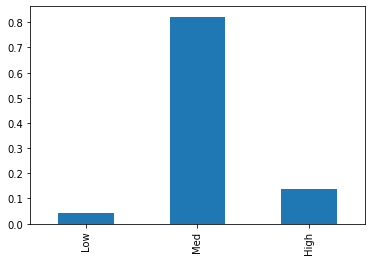

In [150]:
y_train['quality'].value_counts(normalize=True, sort=False).plot.bar()
y_test['quality'].value_counts(normalize=True, sort=False).plot.bar()

In [15]:
model(X_train_stand, y_train, X_test_stand, y_test)

,Model,Accuracy
0,RidgeClassifier,0.8425
1,SGDClassifier,0.8025
2,LinearSVC,0.8450
3,SVC,0.8575
4,DecisionTreeClassifier,0.7975
5,ExtraTreeClassifier,0.7825
6,AdaBoostClassifier,0.7300
7,BaggingClassifier,0.8475
8,GradientBoostingClassifier,0.8125
9,RandomForestClassifier,0.8475


In [16]:
def treinar_modelo(params):
  from sklearn.metrics import accuracy_score
  max_leaf_nodes = params[0]
  n_estimators = params[1]
  max_depth = params[2]

  rf = RandomForestClassifier(max_leaf_nodes = max_leaf_nodes, n_estimators = n_estimators, max_depth=max_depth)
  rf.fit(X_train_stand, y_train)
  predict_rf = rf.predict(X_test_stand)
  
  return accuracy_score(y_test, predict_rf)

In [18]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [19]:
from skopt import dummy_minimize

C:\Users\mpaul\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:

# Dummy minimize will be use to find parameters at randomly from a sample
space = [(2, 145), (50, 1000), (50, 1000)]
random_result = dummy_minimize(treinar_modelo, dimensions=space, random_state=42, verbose=0)


[3, 393, 541]


NameError: name 'random_result_dummies' is not defined

In [21]:
# Best parameters
print(random_result.x)
# Score of the best model
print(random_result.fun)

[3, 393, 541]
0.835


## Ridge Regression: Building, Trainning and Checking accuracy

#### Model Tuning
- XGBoost has a few parameters that can dramatically affect your model's accuracy and training speed. The first parameters you should understand are:

- GridSearchCV for hyper-parameters tuning XGBoost models using Pipelines

In [135]:
!pip install xgboost

In [32]:
print(searchCV.cv_results_['mean_train_score'].mean(), searchCV.cv_results_['mean_test_score'].mean())

0.16322549464067507 -0.07599857604828257


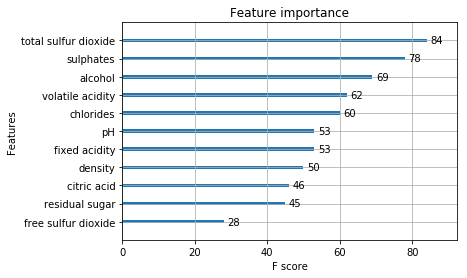

In [46]:
# Partial Dependence Plots
# Feature importance
import xgboost
xgboost.plot_importance(my_pipeline5)

In [50]:
## xgboost.plot_tree(my_pipeline5) error?

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x157acf0cef0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x157ada63e10>})

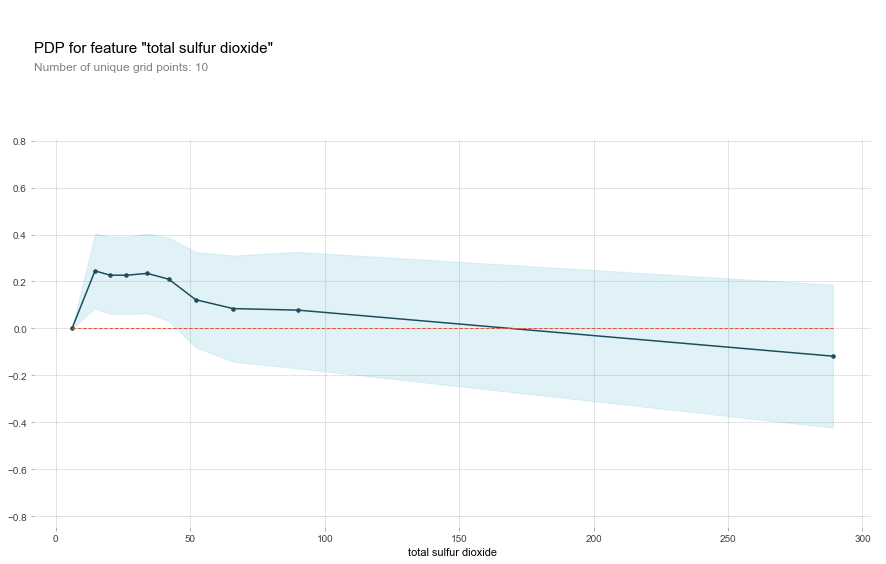

In [49]:
from pdpbox import pdp
# convert to DataFrame as pdp package requires a DataFrame
X1 = atributes
my_model = XGBRegressor()
my_model.fit(X1, y)
feature = 'total sulfur dioxide'
p = pdp.pdp_isolate(my_model, X1, X1.columns, feature)
pdp.pdp_plot(p, feature)

## Building [Data Splitting and Classification Model]

### Data Splitting and Preprocessing

In [ ]:
# Creating classes of quality
# 1-4 = Bad wines
# 5-6 = Medium wines
# 7-10 = Good wines

classes = []
for i in wines['quality']:
    if i >= 1 and i <= 4:
        classes.append('1')
    elif i >= 5 and i <= 6:
        classes.append('2')
    elif i >= 7 and i <= 10:
        classes.append('3')
wines['classes'] = classes

In [ ]:
# Defing X2 = predictive variables Y2 = variavel target
atributos2 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
classes_pred = ['classes']

X2 = wines[atributos2].values
Y2 = wines[classes_pred].values

In [ ]:
# Using Standard scaler in predictive variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X2 = sc.fit_transform(X2)

In [ ]:
# Using PCA technique in predictive variables
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X2)

In [ ]:
# Plot the graph to find the principal components "8 in this case"
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [ ]:
#AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 
#we shall pick the first 8 components for our prediction.
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(X2)

In [ ]:
# Setting split rate
split_test_size2 = 0.25

In [ ]:
# Creating test data and train data
from sklearn.model_selection import train_test_split
X_treino2, X_teste2, Y_treino2, Y_teste2 = train_test_split(x_new, Y2, test_size = split_test_size2, random_state = 42)

## KNN / SVM / Naive Bayes / DecisionTree / GradientBoosting / RandomForest / SGDC

In [ ]:
# Importing Classifier modules
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_treino2, Y_treino2.ravel())
KNN_predict_test = model_KNN.predict(X_teste2)
    
acc_KNN = accuracy_score(Y_teste2, KNN_predict_test)
print(acc_KNN)
print(confusion_matrix(Y_teste2, KNN_predict_test))

In [ ]:
print(acc_KNN)

In [ ]:
model_SVC = SVC()
model_SVC.fit(X_treino2, Y_treino2.ravel())
SVC_predict_test = model_SVC.predict(X_teste2)
    
acc_SVC = accuracy_score(Y_teste2, SVC_predict_test)
print(acc_SVC)
print(confusion_matrix(Y_teste2, SVC_predict_test))

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_treino2, Y_treino2.ravel())
NB_predict_test = model_NB.predict(X_teste2)

acc_NB = accuracy_score(Y_teste2, NB_predict_test)
print(acc_NB)
print(confusion_matrix(Y_teste2, NB_predict_test))

In [ ]:
model_XG = GradientBoostingClassifier()
model_XG.fit(X_treino2, Y_treino2.ravel())
XG_predict_test = model_XG.predict(X_teste2)

acc_XG = accuracy_score(Y_teste2, XG_predict_test)
print(acc_XG)
print(confusion_matrix(Y_teste2, XG_predict_test))

In [ ]:
model_SDG = SGDClassifier()
model_SDG.fit(X_treino2, Y_treino2.ravel())
SDG_predict_test = model_SDG.predict(X_teste2)

acc_SDG = accuracy_score(Y_teste2, SDG_predict_test)
print(acc_SDG)
print(confusion_matrix(Y_teste2, SDG_predict_test))

In [ ]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_treino2, Y_treino2.ravel())
DT_predict_test = model_DT.predict(X_teste2)

acc_DT = accuracy_score(Y_teste2, DT_predict_test)
print(acc_DT)
print(confusion_matrix(Y_teste2, DT_predict_test))

In [ ]:
model_RF = RandomForestClassifier()
model_RF.fit(X_treino2, Y_treino2.ravel())
RF_predict_test = model_RF.predict(X_teste2)

acc_RF = accuracy_score(Y_teste2, RF_predict_test)
print(acc_RF)
print(confusion_matrix(Y_teste2, RF_predict_test))

## Resume

In [ ]:
accuracy = [acc_KNN, acc_SVC, acc_NB, acc_XG, acc_SDG, acc_DT, acc_RF]
classifier = ['KNearestNeightbors','Support Vector Machine','Naive Bayes','Gradient Booster', 'SGDClassifier','Decision Tree','Random Forest']
explain = [explain_SVR, explain_RP, explain_Lasso]
regression = ['Support Vector Regression', 'Ridge Regression', 'Lasso Regression']

In [ ]:
c={'Classifier Model':classifier,'Accuracy':accuracy}
r={'Regression Model':regression, 'Explained Variance':explain}

In [ ]:
acc_df=pd.DataFrame(c)
acc_df

In [ ]:
exp_df=pd.DataFrame(r)
exp_df